In [9]:
import sys
print(sys.executable)


c:\Users\DSP\Desktop\sidhart_python\.venv\Scripts\python.exe


In [26]:
pip install pandas  


  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl (12.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------

In [33]:
import pandas as pd

# Load your raw trade data
df = pd.read_csv("../data/raw/Siddharth_Associates.csv")


# Show the first few rows to inspect
print(df.head())

# Print column names
print(df.columns)

# Basic summary
print(df.info())

# Check for missing values
print(df.isnull().sum())


  PORT CODE        DATE        IEC   HS CODE  \
0    INNSA1  2025-10-28  301049751  73239990   
1    INNSA1  2025-10-28  301049751  73231000   
2    INNSA1  2025-10-23  301049751  73239990   
3    INNSA1  2025-10-13  301049751  73239990   
4    INNSA1  2025-10-13  301049751  73239990   

                                   GOODS DESCRIPTION  Master category  \
0  TH5170 STEEL CUTLERY HOLDER (QTY:600 PCS/USD 2...              NaN   
1  8001-2 STEEL SCRUBBER 2PCS SET (QTY: 336000 SE...              NaN   
2  MILD STEEL MULTI FUNCTION CLOTH STAND (RYX-02-...              NaN   
3  SB-12 STEEL TEA STRAINER BIG (QTY 6336 PCS/USD...              NaN   
4  SB-12 STEEL TEA STRAINER BIG (QTY 43038 PCS/US...              NaN   

   Model Name  Model Number  Capacity  Qty  Unit of measure  Price  \
0         NaN           NaN       NaN  NaN              NaN    NaN   
1         NaN           NaN       NaN  NaN              NaN    NaN   
2         NaN           NaN       NaN  NaN              NaN   

In [36]:

print(df.columns)
print(df.info())
print(df.describe(include='all'))  # Quick stats on all columns


Index(['PORT CODE', 'DATE', 'IEC', 'HS CODE', 'GOODS DESCRIPTION',
       'Master category', 'Model Name', 'Model Number', 'Capacity', 'Qty',
       'Unit of measure', 'Price', 'Unit of measure.1', 'QUANTITY', 'UNIT',
       'UNIT PRICE_INR', 'TOTAL VALUE_INR', 'UNIT PRICE_USD',
       'TOTAL VALUE_USD', 'DUTY PAID_INR'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PORT CODE          2079 non-null   object 
 1   DATE               2079 non-null   object 
 2   IEC                2079 non-null   int64  
 3   HS CODE            2079 non-null   int64  
 4   GOODS DESCRIPTION  2079 non-null   object 
 5   Master category    0 non-null      float64
 6   Model Name         0 non-null      float64
 7   Model Number       0 non-null      float64
 8   Capacity           0 non-null      float64
 9   Qty           

In [38]:

# Example: Drop rows missing any of these key fields
# Drop columns with all NaN values
df_clean = df.dropna(axis=1, how='all')
print(df_clean.columns)




Index(['PORT CODE', 'DATE', 'IEC', 'HS CODE', 'GOODS DESCRIPTION', 'QUANTITY',
       'UNIT', 'UNIT PRICE_INR', 'TOTAL VALUE_INR', 'UNIT PRICE_USD',
       'TOTAL VALUE_USD', 'DUTY PAID_INR'],
      dtype='object')


In [39]:
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], errors='coerce')


C:\Users\DSP\AppData\Local\Temp\ipykernel_1944\4132565038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], errors='coerce')


In [40]:
print(df_clean['UNIT'].unique())


['KGS' 'NOS' 'PCS' 'KGS ' 'KG' 'SET']


In [41]:
unit_map = {
    'KGS': 'KGS', 'KGS ': 'KGS', 'KG': 'KGS',
    'NOS': 'PCS', 'PCS': 'PCS',
    'SET': 'SET'
}

def standardize_unit(unit):
    if not isinstance(unit, str):
        return unit
    normalized = unit.strip().upper()
    return unit_map.get(normalized, normalized)  # fallback to normalized

df_clean['UNIT_STD'] = df_clean['UNIT'].apply(standardize_unit)
print(df_clean['UNIT_STD'].unique())


['KGS' 'PCS' 'SET']


C:\Users\DSP\AppData\Local\Temp\ipykernel_1944\2051463123.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['UNIT_STD'] = df_clean['UNIT'].apply(standardize_unit)


In [42]:
import re

def extract_model(description):
    if not isinstance(description, str):
        return None
    # Example: finds model at the start or before first non-word character
    match = re.search(r'^([A-Za-z0-9\-]+)', description)
    return match.group(1) if match else None

def extract_quantity(description):
    if not isinstance(description, str):
        return None
    # Quantities usually within "QTY:123 PCS" etc.
    match = re.search(r'QTY[:\s]*([\d,\.]+)', description)
    if match:
        return float(match.group(1).replace(',', ''))
    return None

def extract_unit_price_usd(description):
    if not isinstance(description, str):
        return None
    # Finds "USD X" or "USD X/PC" etc.
    match = re.search(r'USD\s*([\d\.]+)', description.upper())
    if match:
        return float(match.group(1))
    return None

# Apply parsers to your dataframe
df_clean['EXTRACTED_MODEL'] = df_clean['GOODS DESCRIPTION'].apply(extract_model)
df_clean['EXTRACTED_QTY'] = df_clean['GOODS DESCRIPTION'].apply(extract_quantity)
df_clean['EXTRACTED_UNIT_PRICE_USD'] = df_clean['GOODS DESCRIPTION'].apply(extract_unit_price_usd)

# See samples
print(df_clean[['GOODS DESCRIPTION','EXTRACTED_MODEL','EXTRACTED_QTY','EXTRACTED_UNIT_PRICE_USD']].head(10))


                                   GOODS DESCRIPTION EXTRACTED_MODEL  \
0  TH5170 STEEL CUTLERY HOLDER (QTY:600 PCS/USD 2...          TH5170   
1  8001-2 STEEL SCRUBBER 2PCS SET (QTY: 336000 SE...          8001-2   
2  MILD STEEL MULTI FUNCTION CLOTH STAND (RYX-02-...            MILD   
3  SB-12 STEEL TEA STRAINER BIG (QTY 6336 PCS/USD...           SB-12   
4  SB-12 STEEL TEA STRAINER BIG (QTY 43038 PCS/US...           SB-12   
5  STEEL HANGER WITH HOOK (SL-89) (QTY:70056 PCS/...           STEEL   
6  STEEL HANGER 10PCS SET (AM-969) (QTY: 480 SET/...           STEEL   
7  AM-967 STEEL FRUIT BASKET (QTY 400 PCS/USD 1.0...          AM-967   
8  AM-966 STEEL FRUIT BASKET (QTY 400 PCS/USD 1.0...          AM-966   
9  AM-965 STEEL SPOON & FORK HOLDER (QTY 480 PCS/...          AM-965   

   EXTRACTED_QTY  EXTRACTED_UNIT_PRICE_USD  
0          600.0                    2.0300  
1       336000.0                    0.1390  
2         1232.0                       NaN  
3         6336.0           

C:\Users\DSP\AppData\Local\Temp\ipykernel_1944\867615286.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EXTRACTED_MODEL'] = df_clean['GOODS DESCRIPTION'].apply(extract_model)
C:\Users\DSP\AppData\Local\Temp\ipykernel_1944\867615286.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EXTRACTED_QTY'] = df_clean['GOODS DESCRIPTION'].apply(extract_quantity)
C:\Users\DSP\AppData\Local\Temp\ipykernel_1944\867615286.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [44]:
def extract_capacity(description):
    if not isinstance(description, str):
        return None
    # Example patterns: 10PCS, 500ML, 24 INCH, etc.
    match = re.search(r'(\d+(\.\d+)?\s?(PCS|ML|L|INCH|CM|SET))', description.upper())
    return match.group(0) if match else None

def extract_material(description):
    if not isinstance(description, str):
        return None
    # Looks for common words STEEL, PLASTIC, WOOD, GLASS, etc.
    materials = ["STEEL", "PLASTIC", "WOOD", "GLASS"]
    for m in materials:
        if m in description.upper():
            return m
    return None

# Use .loc to avoid SettingWithCopyWarning
df_clean.loc[:, 'EXTRACTED_CAPACITY'] = df_clean['GOODS DESCRIPTION'].apply(extract_capacity)
df_clean.loc[:, 'EXTRACTED_MATERIAL'] = df_clean['GOODS DESCRIPTION'].apply(extract_material)

print(df_clean[['GOODS DESCRIPTION', 'EXTRACTED_CAPACITY', 'EXTRACTED_MATERIAL']].head(10))


                                   GOODS DESCRIPTION EXTRACTED_CAPACITY  \
0  TH5170 STEEL CUTLERY HOLDER (QTY:600 PCS/USD 2...            600 PCS   
1  8001-2 STEEL SCRUBBER 2PCS SET (QTY: 336000 SE...               2PCS   
2  MILD STEEL MULTI FUNCTION CLOTH STAND (RYX-02-...            232 PCS   
3  SB-12 STEEL TEA STRAINER BIG (QTY 6336 PCS/USD...           6336 PCS   
4  SB-12 STEEL TEA STRAINER BIG (QTY 43038 PCS/US...          43038 PCS   
5  STEEL HANGER WITH HOOK (SL-89) (QTY:70056 PCS/...          70056 PCS   
6  STEEL HANGER 10PCS SET (AM-969) (QTY: 480 SET/...              10PCS   
7  AM-967 STEEL FRUIT BASKET (QTY 400 PCS/USD 1.0...            400 PCS   
8  AM-966 STEEL FRUIT BASKET (QTY 400 PCS/USD 1.0...            400 PCS   
9  AM-965 STEEL SPOON & FORK HOLDER (QTY 480 PCS/...            480 PCS   

  EXTRACTED_MATERIAL  
0              STEEL  
1              STEEL  
2              STEEL  
3              STEEL  
4              STEEL  
5              STEEL  
6            

Feature Engineering Code


In [45]:
df_clean.loc[:, 'GRAND_TOTAL_INR'] = df_clean['TOTAL VALUE_INR'] + df_clean['DUTY PAID_INR']

df_clean.loc[:, 'LANDED_COST_PER_UNIT'] = df_clean.apply(
    lambda row: row['GRAND_TOTAL_INR'] / row['QUANTITY'] if row['QUANTITY'] and row['QUANTITY'] > 0 else None,
    axis=1
)

# Save cleaned data
df_clean.to_csv("../data/processed/trade_cleaned.csv", index=False)


C:\Users\DSP\AppData\Local\Temp\ipykernel_1944\2902635800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'GRAND_TOTAL_INR'] = df_clean['TOTAL VALUE_INR'] + df_clean['DUTY PAID_INR']


In [46]:
def assign_category(hs_code):
    hs_code = str(hs_code)
    if hs_code.startswith('7323'):
        return 'Kitchenware'
    elif hs_code.startswith('7324'):
        return 'Household Articles'
    elif hs_code.startswith('7321'):
        return 'Cookers'
    else:
        return 'Other'

df_clean.loc[:, 'CATEGORY'] = df_clean['HS CODE'].apply(assign_category)


In [47]:
# Example: Count how many unique IEC codes per year (supplier analysis)
df_clean.loc[:, 'YEAR'] = df_clean['DATE'].dt.year
supplier_counts = df_clean.groupby('YEAR')['IEC'].nunique()
print(supplier_counts)


YEAR
2017    1
2018    1
2019    1
2020    1
2021    1
2022    1
2023    1
2024    1
2025    1
Name: IEC, dtype: int64


In [48]:
df_clean.loc[:, 'MONTH'] = df_clean['DATE'].dt.month
df_clean.loc[:, 'QUARTER'] = df_clean['DATE'].dt.quarter


In [49]:
pareto_hsn = df_clean.groupby('HS CODE')['TOTAL VALUE_INR'].sum().sort_values(ascending=False)
pareto_hsn_pct = pareto_hsn.cumsum() / pareto_hsn.sum()
df_clean.loc[:, 'TOP_HSN'] = df_clean['HS CODE'].isin(pareto_hsn[pareto_hsn_pct <= 0.8].index)


In [50]:
high_value_cutoff = df_clean['TOTAL VALUE_INR'].quantile(0.95)
df_clean.loc[:, 'HIGH_VALUE_TXN'] = df_clean['TOTAL VALUE_INR'] > high_value_cutoff


In [51]:
def per_unit_cost(row):
    if row['QUANTITY'] and row['LANDED_COST_PER_UNIT']:
        return row['LANDED_COST_PER_UNIT']
    return None

df_clean.loc[:, 'COST_PER_UNIT'] = df_clean.apply(per_unit_cost, axis=1)


In [52]:
df_clean.to_csv("../data/processed/trade_featured.csv", index=False)


Category & Sub-Category

In [53]:
def get_category(row):
    hs_code = str(row['HS CODE'])
    descr = row['GOODS DESCRIPTION'].upper()
    # Rule examples (you can expand or adjust)
    if hs_code.startswith('7323'):
        return 'Kitchenware'
    elif hs_code.startswith('7324'):
        return 'Household'
    elif 'STRAINER' in descr:
        return 'Strainers'
    elif 'BASKET' in descr:
        return 'Baskets'
    else:
        return 'Other'

df_clean.loc[:, 'CATEGORY'] = df_clean.apply(get_category, axis=1)


In [54]:
def get_sub_category(description):
    if not isinstance(description, str):
        return None
    description = description.upper()
    if 'CUTLERY' in description:
        return 'Cutlery'
    elif 'HANGER' in description:
        return 'Hangers'
    elif 'SCRUBBER' in description:
        return 'Scrubbers'
    elif 'STAND' in description:
        return 'Stands'
    elif 'BASKET' in description:
        return 'Baskets'
    elif 'STRAINER' in description:
        return 'Strainers'
    else:
        return 'Misc'

df_clean.loc[:, 'SUB_CATEGORY'] = df_clean['GOODS DESCRIPTION'].apply(get_sub_category)


In [55]:
print(df_clean[['GOODS DESCRIPTION', 'CATEGORY', 'SUB_CATEGORY']].head(10))


                                   GOODS DESCRIPTION     CATEGORY SUB_CATEGORY
0  TH5170 STEEL CUTLERY HOLDER (QTY:600 PCS/USD 2...  Kitchenware      Cutlery
1  8001-2 STEEL SCRUBBER 2PCS SET (QTY: 336000 SE...  Kitchenware    Scrubbers
2  MILD STEEL MULTI FUNCTION CLOTH STAND (RYX-02-...  Kitchenware       Stands
3  SB-12 STEEL TEA STRAINER BIG (QTY 6336 PCS/USD...  Kitchenware    Strainers
4  SB-12 STEEL TEA STRAINER BIG (QTY 43038 PCS/US...  Kitchenware    Strainers
5  STEEL HANGER WITH HOOK (SL-89) (QTY:70056 PCS/...  Kitchenware      Hangers
6  STEEL HANGER 10PCS SET (AM-969) (QTY: 480 SET/...  Kitchenware      Hangers
7  AM-967 STEEL FRUIT BASKET (QTY 400 PCS/USD 1.0...  Kitchenware      Baskets
8  AM-966 STEEL FRUIT BASKET (QTY 400 PCS/USD 1.0...  Kitchenware      Baskets
9  AM-965 STEEL SPOON & FORK HOLDER (QTY 480 PCS/...  Kitchenware         Misc


In [56]:
df_clean.to_csv("../data/processed/trade_category_subcat.csv", index=False)


In [58]:
# Top categories by value
cat_summary = df_clean.groupby('CATEGORY')['TOTAL VALUE_INR'].sum().sort_values(ascending=False)
print(cat_summary)


CATEGORY
Kitchenware    4.193938e+09
Name: TOTAL VALUE_INR, dtype: float64


Group by SUB_CATEGORY as well

In [59]:
subcat_summary = df_clean.groupby('SUB_CATEGORY')['TOTAL VALUE_INR'].sum().sort_values(ascending=False)
print(subcat_summary)


SUB_CATEGORY
Misc         3.002865e+09
Stands       4.146908e+08
Scrubbers    3.344794e+08
Strainers    2.226366e+08
Hangers      1.704504e+08
Baskets      3.143521e+07
Cutlery      1.738150e+07
Name: TOTAL VALUE_INR, dtype: float64


In [60]:
time_summary = df_clean.groupby(['YEAR', 'MONTH', 'CATEGORY'])['TOTAL VALUE_INR'].sum().reset_index()
print(time_summary)


     YEAR  MONTH     CATEGORY  TOTAL VALUE_INR
0    2017      1  Kitchenware       9182720.76
1    2017      2  Kitchenware      11403893.57
2    2017      3  Kitchenware       2671270.60
3    2017      4  Kitchenware       8452061.26
4    2017      5  Kitchenware      18168280.31
..    ...    ...          ...              ...
101  2025      6  Kitchenware      23895181.15
102  2025      7  Kitchenware      28885422.04
103  2025      8  Kitchenware      15411237.54
104  2025      9  Kitchenware      36747827.72
105  2025     10  Kitchenware      22019635.41

[106 rows x 4 columns]


Pareto/Top-N Analysis

In [61]:
cum_sum = subcat_summary.cumsum() / subcat_summary.sum()
pareto_cutoff = subcat_summary[cum_sum <= 0.8]
print(pareto_cutoff)


SUB_CATEGORY
Misc    3.002865e+09
Name: TOTAL VALUE_INR, dtype: float64


In [62]:
supplier_summary = df_clean.groupby('IEC')['TOTAL VALUE_INR'].sum().sort_values(ascending=False)
print(supplier_summary.head(10))  # Top 10 suppliers by value


IEC
301049751    4.193938e+09
Name: TOTAL VALUE_INR, dtype: float64


In [63]:
subcat_summary.to_csv("../data/processed/subcat_summary.csv")


Visualize Trends

In [66]:
pip install matplotlib


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.3 MB 7.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/8.3 MB 7.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.3 MB 7.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.8/8.3 MB 7.5 MB/s eta 0:00:01
   ----------------------------------- ---- 7.3/8.3 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 7.4 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.1 MB 7.5 MB/s eta 0:00:01
   ----------------- ---------------------- 3.1/7.1 MB 7.4 MB/s eta 0:00:01
   ---------------------- -------------

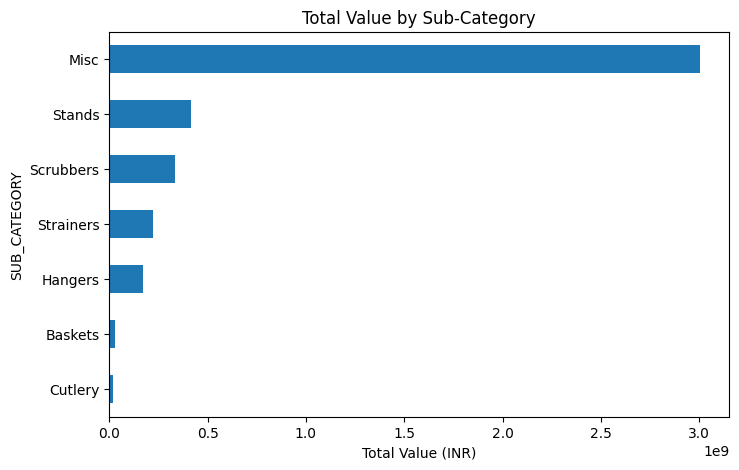

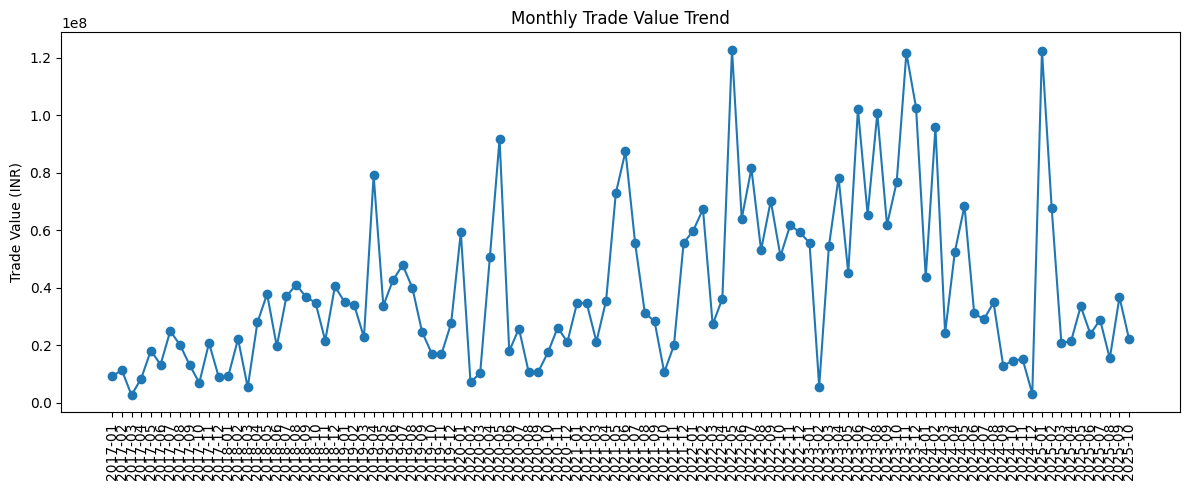

In [67]:
import matplotlib.pyplot as plt

# Plot sub-category revenue
df_clean.groupby('SUB_CATEGORY')['TOTAL VALUE_INR'].sum().sort_values().plot(
    kind='barh', figsize=(8,5), title='Total Value by Sub-Category'
)
plt.xlabel('Total Value (INR)')
plt.show()

# Plot monthly trend
time_summary = df_clean.groupby(['YEAR', 'MONTH'])['TOTAL VALUE_INR'].sum().reset_index()
time_summary['PERIOD'] = time_summary['YEAR'].astype(str) + '-' + time_summary['MONTH'].astype(str).str.zfill(2)
plt.figure(figsize=(12,5))
plt.plot(time_summary['PERIOD'], time_summary['TOTAL VALUE_INR'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Trade Value Trend')
plt.ylabel('Trade Value (INR)')
plt.tight_layout()
plt.show()


Load DataFrame to SQLite Database Table

In [70]:
import sqlite3

# Connect to (or create) your database file
conn = sqlite3.connect("../data/processed/trade_analysis.db")

# Write your DataFrame to a new table (replace if exists)
df_clean.to_sql('trade_details', conn, if_exists='replace', index=False)

# List tables to confirm
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)
conn.close()


            name
0  trade_details


In [72]:

import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/processed/trade_analysis.db")
query = """
SELECT SUB_CATEGORY, SUM("TOTAL VALUE_INR") AS total_value_inr
FROM trade_details
GROUP BY SUB_CATEGORY
ORDER BY total_value_inr DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)
conn.close()


  SUB_CATEGORY  total_value_inr
0         Misc     3.002865e+09
1       Stands     4.146908e+08
2    Scrubbers     3.344794e+08
3    Strainers     2.226366e+08
4      Hangers     1.704504e+08
5      Baskets     3.143521e+07
6      Cutlery     1.738150e+07


In [74]:
import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect("../data/processed/trade_analysis.db")

# Write your SQL query as a string (triple quotes for multi-line)
query = """
SELECT IEC, SUM("TOTAL VALUE_INR") AS total_value_inr
FROM trade_details
GROUP BY IEC
ORDER BY total_value_inr DESC
"""

# Use pandas to execute the query
supplier_summary = pd.read_sql_query(query, conn)
print(supplier_summary)

conn.close()



         IEC  total_value_inr
0  301049751     4.193938e+09


In [76]:

import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect("../data/processed/trade_analysis.db")

# Write your SQL query as a string (triple quotes for multi-line)

query = """
SELECT YEAR, MONTH, SUM("TOTAL VALUE_INR") AS total_value_inr
FROM trade_details
GROUP BY YEAR, MONTH
ORDER BY total_value_inr DESC
LIMIT 5
"""
monthly_peaks = pd.read_sql_query(query, conn)
print(monthly_peaks)

   YEAR  MONTH  total_value_inr
0  2022      5     1.228149e+08
1  2025      1     1.224753e+08
2  2023     11     1.216661e+08
3  2023     12     1.026360e+08
4  2023      6     1.021269e+08


In [ ]:

import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect("../data/processed/trade_analysis.db")

# Write your SQL query as a string (triple quotes for multi-line)


# Use pandas to execute the query
supplier_summary = pd.read_sql_query(query, conn)
print(supplier_summary)

conn.close()

In [77]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/processed/trade_analysis.db")

query = """
SELECT YEAR, MONTH, SUM("TOTAL VALUE_INR") AS total_value_inr
FROM trade_details
GROUP BY YEAR, MONTH
ORDER BY total_value_inr DESC
LIMIT 1
"""
peak_month = pd.read_sql_query(query, conn)
print("Peak month for trade value:")
print(peak_month)

conn.close()


Peak month for trade value:
   YEAR  MONTH  total_value_inr
0  2022      5     1.228149e+08


In [80]:
import sqlite3
import pandas as pd

# (Only needed once; skip if already connected)
conn = sqlite3.connect("../data/processed/trade_analysis.db")

query = """
SELECT YEAR, MONTH, SUM("TOTAL VALUE_INR") AS total_value_inr
FROM trade_details
GROUP BY YEAR, MONTH
ORDER BY total_value_inr DESC
LIMIT 1
"""

peak_month = pd.read_sql_query(query, conn)
print(peak_month)

conn.close()



   YEAR  MONTH  total_value_inr
0  2022      5     1.228149e+08


In [81]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/processed/trade_analysis.db")

query = """
SELECT YEAR, MONTH, SUM("TOTAL VALUE_INR") AS total_value_inr
FROM trade_details
GROUP BY YEAR, MONTH
ORDER BY total_value_inr ASC
LIMIT 1
"""
low_month = pd.read_sql_query(query, conn)
print("Lowest month for trade value:")
print(low_month)

conn.close()


Lowest month for trade value:
   YEAR  MONTH  total_value_inr
0  2017      3        2671270.6


In [82]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/processed/trade_analysis.db")

query = """
SELECT YEAR, SUM("TOTAL VALUE_INR") AS yearly_total
FROM trade_details
GROUP BY YEAR
ORDER BY YEAR
"""
yearly_totals = pd.read_sql_query(query, conn)
print("Yearly total trade value:")
print(yearly_totals)

conn.close()


Yearly total trade value:
   YEAR  yearly_total
0  2017  1.582432e+08
1  2018  3.342265e+08
2  2019  4.214030e+08
3  2020  3.492895e+08
4  2021  4.873978e+08
5  2022  7.543238e+08
6  2023  8.704074e+08
7  2024  4.255180e+08
8  2025  3.931292e+08


<Axes: title={'center': 'Annual Trade Value (INR)'}, xlabel='YEAR'>

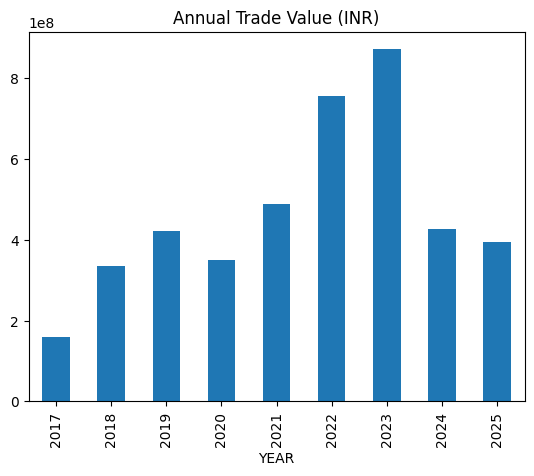

In [83]:
yearly_totals.plot(x='YEAR', y='yearly_total', kind='bar', legend=False,
                   title='Annual Trade Value (INR)')


# Siddharth Associates Trade Data Analysis Pipeline

## 1. Introduction
Brief description...

## 2. Data Cleaning & Feature Engineering
- File/folder management issues resolved.
- Parsing, standardization, new fields.

## 3. SQL Analysis
### Example Query 1: Top Sub-Category by Trade Value


Result:
| SUB_CATEGORY | total_value_inr |
|--------------|----------------|
| Misc         | ...            |

...

### Example Query N

## 4. Visualization
(Bar/line plots, summary tables)

## 5. Business Insights
- Main peak seen in May 2022, value = ₹122,814,900
- “Misc” sub-category dominates revenue.
- (Continue bullets)

## 6. Recommendations
- Disaggregate “Misc”, diversify supplier base...
- (etc.)

## 7. Appendix
- Data and code references, dashboard links, etc.
